## VISUALIZACIÓN DE LOS DATOS

El objetivo es proporcionar a ABC Corporation un informe detallado del contexto general de la empresa utilizando visualizaciones en Python junto con análisis descriptivos donde se resaltaremos tendencias, áreas de mejora y fortalezas dentro de la empresa. Este informe permitirá una comprensión más profunda de la situación actual y servirá como base para la toma de decisiones informadas.


In [1]:
# importamos las librerías que necesitaremos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización de datos en gráficas
# -----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
df = pd.read_csv("CSV_LIMPIADO.csv", index_col=0)
df.head(2)

,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework
age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
51,no,travel_rarely,2015.72,research & development,6,3,unknown,1,1,male,3,5,research director,3,unknown,7,no,13,3.0,3,full time,0,11.36,5,3.0,20,NaN,15,15,1972,195370.0,yes
52,no,travel_rarely,2063.39,Executive Team,1,4,life sciences,2,3,male,2,5,manager,3,unknown,0,no,14,3.0,1,fulltime,1,34.00,5,3.0,33,NaN,11,9,1971,199990.0,yes


In [ ]:
print(f"El número de filas que tenemos es {df.shape[0]}, y el número de columnas es {df.shape[1]}")
print("Nota: La columna Age no se cuenta en .shape porque es el índice, pero también forma parte del DataFrame.")

El número de filas que tenemos es 1678, y el número de columnas es 32
Nota: La columna Loyalty Number no se cuenta en .shape porque es el índice, pero también forma parte del DataFrame.


In [4]:
df = df.reset_index()

In [5]:
df.head(2)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework
0,51,no,travel_rarely,2015.72,research & development,6,3,unknown,1,1,male,3,5,research director,3,unknown,7,no,13,3.0,3,full time,0,11.36,5,3.0,20,NaN,15,15,1972,195370.0,yes
1,52,no,travel_rarely,2063.39,Executive Team,1,4,life sciences,2,3,male,2,5,manager,3,unknown,0,no,14,3.0,1,fulltime,1,34.00,5,3.0,33,NaN,11,9,1971,199990.0,yes


In [7]:
print(f"El número de filas que tenemos es {df.shape[0]}, y el número de columnas es {df.shape[1]}")

El número de filas que tenemos es 1678, y el número de columnas es 33


### ENFOQUE GENERAL DE LA EMPRESA

Se valorarán datos demográficos de los 1614 empleados de la empresa ABC Corporation en el conjunto de datos, revisando su edad media, género, edad media por género, nivel formativo en general, nivel formativo por género y su estado civil.

### Número de empleados

La empresa tiene 1614 empleados

In [12]:
df['employeenumber'].unique()

array([   1,    2,    3, ..., 1612, 1613, 1614], shape=(1614,))

In [ ]:
df['employeenumber'].duplicated().sum()
# tenemos 64 registros duplicados (más de una consulta por empleado)

np.int64(64)

In [ ]:
df_sin_duplicados = df.drop_duplicates(subset='employeenumber')
# eliminamos los duplicados por asegurarnos

In [15]:
df_sin_duplicados.duplicated().sum()

np.int64(0)

In [19]:
df_sin_duplicados['employeenumber'].unique()

array([   1,    2,    3, ..., 1612, 1613, 1614], shape=(1614,))

### EDAD MEDIA DE LOS EMPLEADOS

La edad media de los empleados es de casi 37 años (36,92), con empleados entre los 18 años y los 60 años de máximo.

In [27]:
df_sin_duplicados['age'].describe()

count    1614.000000
mean       36.920694
std         9.102157
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'Histplot con el Número de empleados por edad')

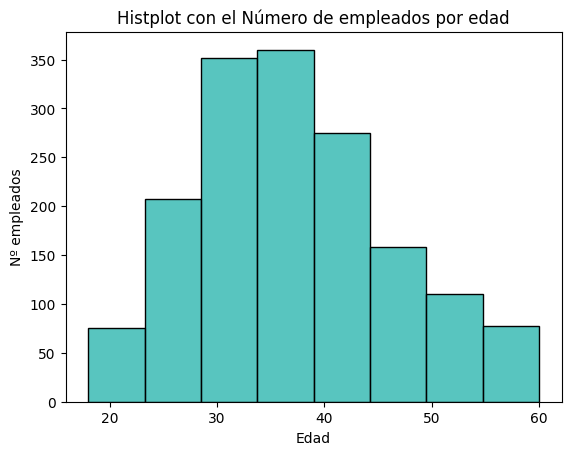

In [39]:
sns.histplot(data=df_sin_duplicados, x='age', bins=8, color='lightseagreen')
plt.xlabel("Edad")
plt.ylabel("Nº empleados")
plt.title('Histplot con el Número de empleados por edad', fontsize=12)

### GÉNERO DE LOS EMPLEADOS

El género de los empleados es mayoritariamente masculino (60,16%), con 971 hombres y 643 mujeres.

In [29]:
df_sin_duplicados['gender'].value_counts()

gender
male      971
female    643
Name: count, dtype: int64

In [40]:
round(df_sin_duplicados['gender'].value_counts(normalize=True) * 100, 2)

gender
male      60.16
female    39.84
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Countplot con el Número de empleados por género')

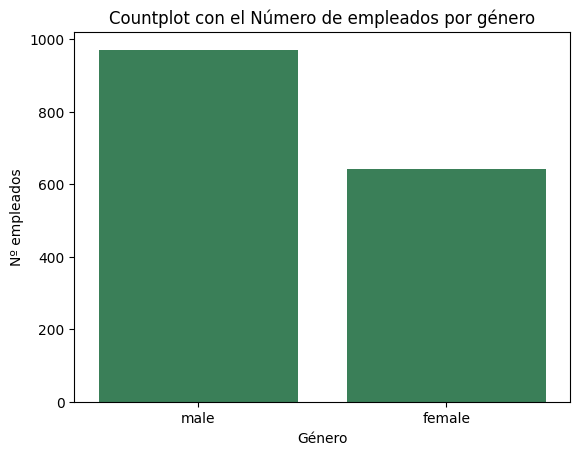

In [38]:
sns.countplot(data=df_sin_duplicados, x='gender', color='seagreen')
plt.xlabel("Género")
plt.ylabel("Nº empleados")
plt.title('Countplot con el Número de empleados por género', fontsize=12)

### EDAD MEDIA POR GÉNERO DE LOS EMPLEADOS

La edad media de los empleados por género es casi la misma, con una edad media de 36,7 años los hombres y con una media de 37,26 años las mujeres.

In [43]:
df_sin_duplicados.groupby('gender')['age'].mean()

gender
female    37.259720
male      36.696189
Name: age, dtype: float64

In [47]:
df_género_edad = round(df_sin_duplicados.groupby('gender')['age'].mean(), 2).reset_index()
df_género_edad

,gender,age
0,female,37.26
1,male,36.70


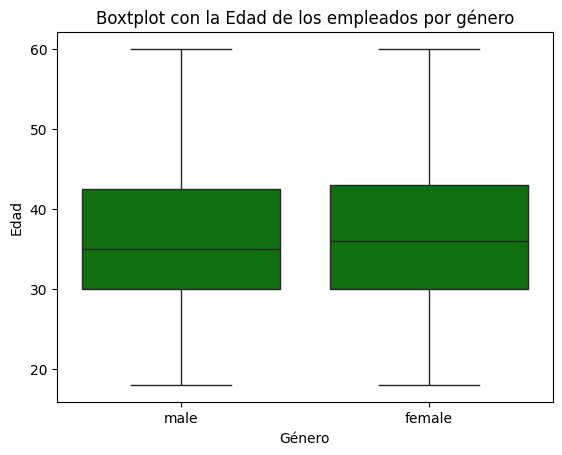

In [71]:
sns.boxplot(x='gender', y='age', data=df_sin_duplicados, color='green')
plt.xlabel("Género")
plt.ylabel("Edad")
plt.title('Boxtplot con la Edad de los empleados por género', fontsize=12);

### NIVEL FORMATIVO DE LOS EMPLEADOS

El nivel formativo de los empleados es principalmente Desconocido (745 empleados), siguiéndole life sciences (349 empleados), medical (276 empleados), marketing (104 empleados), technical degree (69 empleados), other (59 empleados) y human resources (12 empleados).

In [70]:
df_sin_duplicados['educationfield'].unique()

array(['unknown', 'life sciences', 'technical degree', 'medical', 'other',
       'marketing', 'human resources'], dtype=object)

In [76]:
df_sin_duplicados['educationfield'].describe()

count        1614
unique          7
top       unknown
freq          745
Name: educationfield, dtype: object

In [75]:
df_sin_duplicados['educationfield'].value_counts()

educationfield
unknown             745
life sciences       349
medical             276
marketing           104
technical degree     69
other                59
human resources      12
Name: count, dtype: int64

Text(0.5, 1.0, 'Countplot con el Número de empleados por nivel formativo')

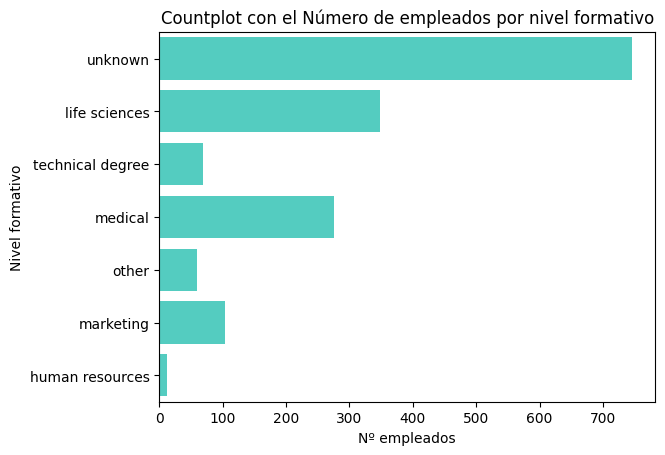

In [73]:
sns.countplot(data=df_sin_duplicados, y='educationfield', color='turquoise')
plt.xlabel("Nº empleados")
plt.ylabel("Nivel formativo")
plt.title('Countplot con el Número de empleados por nivel formativo', fontsize=12)